<a href="https://colab.research.google.com/github/YaelLopezS/Notebooks-Inteligencia-Artificial-2/blob/main/Notebook6_TimeSeries_A01664809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


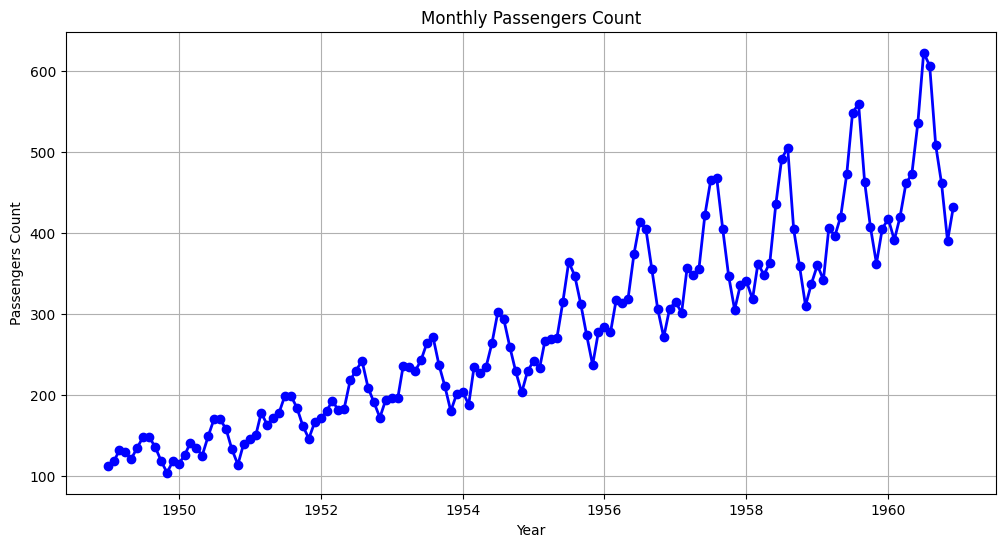

In [ ]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Passengers Count')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.grid(True)
plt.show()

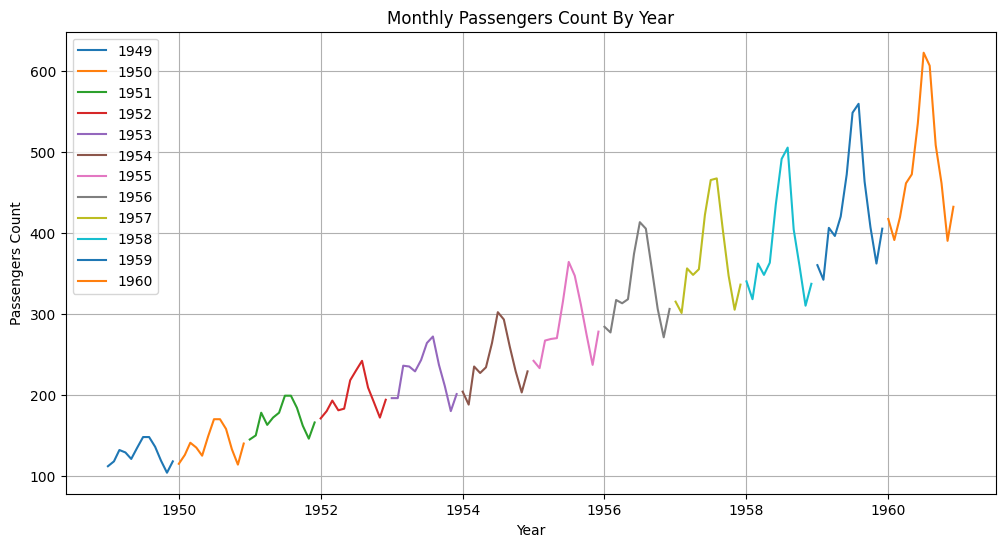

In [ ]:
# Extract years from data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
  year_data = df[df.index.year == year]
  plt.plot(year_data['Passengers'], label=year)

plt.title('Monthly Passengers Count By Year')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

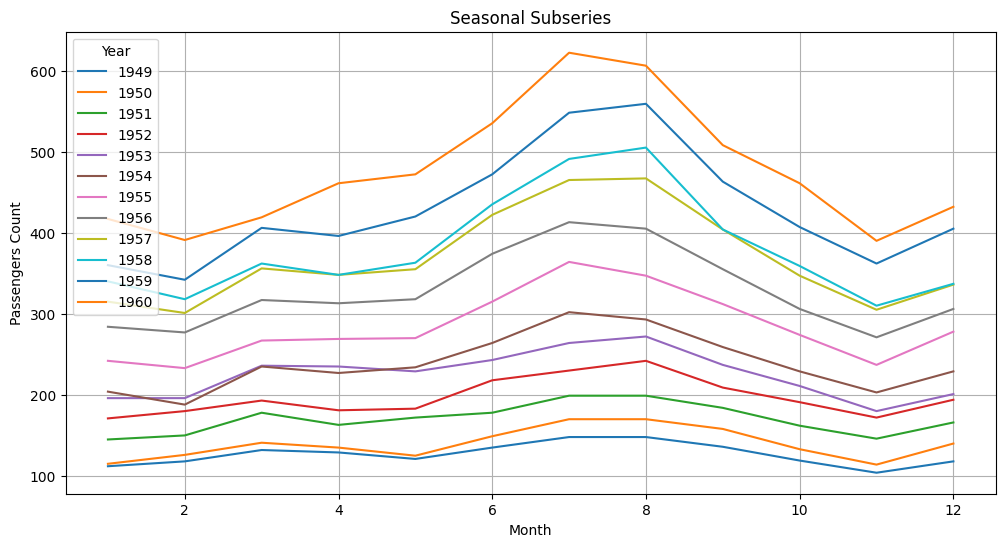

In [ ]:
# Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table
table = pd.pivot_table(df,
                       values='Passengers',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# Plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers Count')
ax.set_title('Seasonal Subseries')
plt.grid(True)
plt.show()

/tmp/ipython-input-2348247343.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


Text(0, 0.5, 'Density')

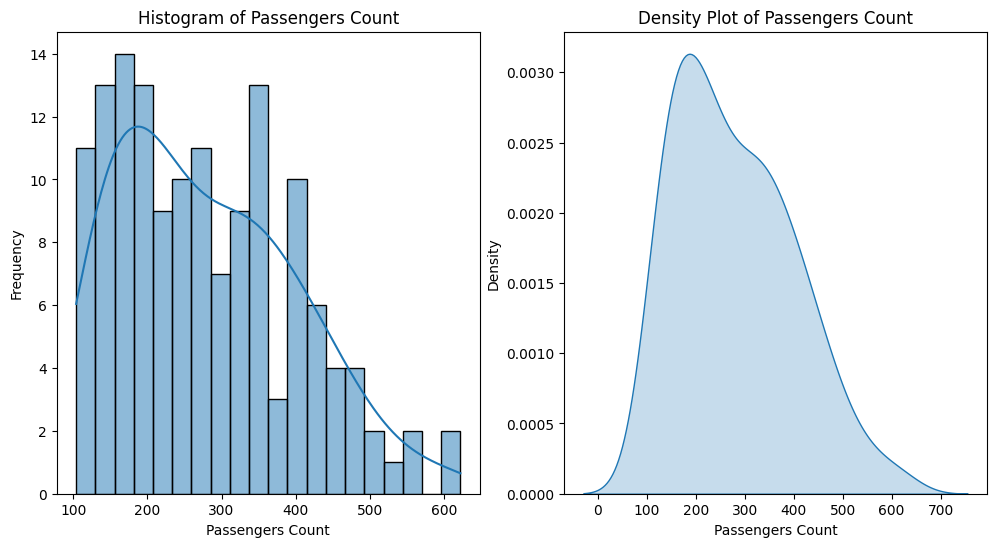

In [ ]:
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Histogram of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

# Densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density Plot of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Density')

Exercise 1.

Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series

Exercise 2.

Use the Unemployment in America dataset(https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state)

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,4)

In [ ]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys,[res[0], res[1], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat, "pvalue": pval, "lags": lags, "crit_values": crit, "regression": regression}

def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window).mean()
  rolling_var = s.rolling(window).var()
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + "- var")
  plt.show()


In [ ]:
n = 240  # months
t =  np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0, 1, n))

trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0, 1, n))


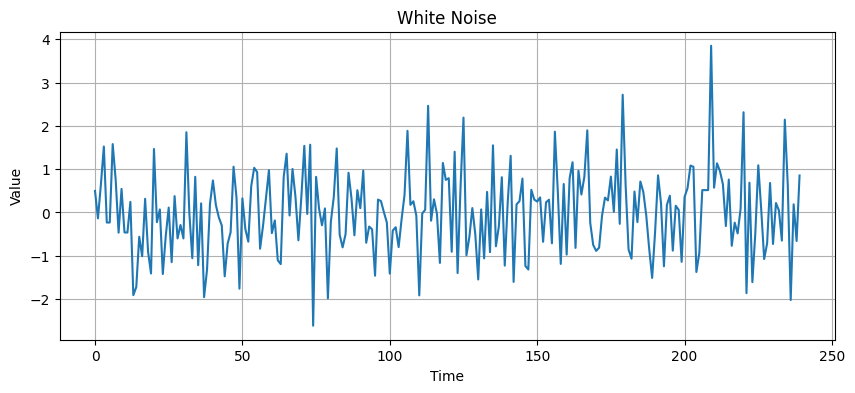

Test White Noise
ADF Statistic: -16.112 p=5.006520467194035e-29
KPSS: stat=0.298 p=0.1


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


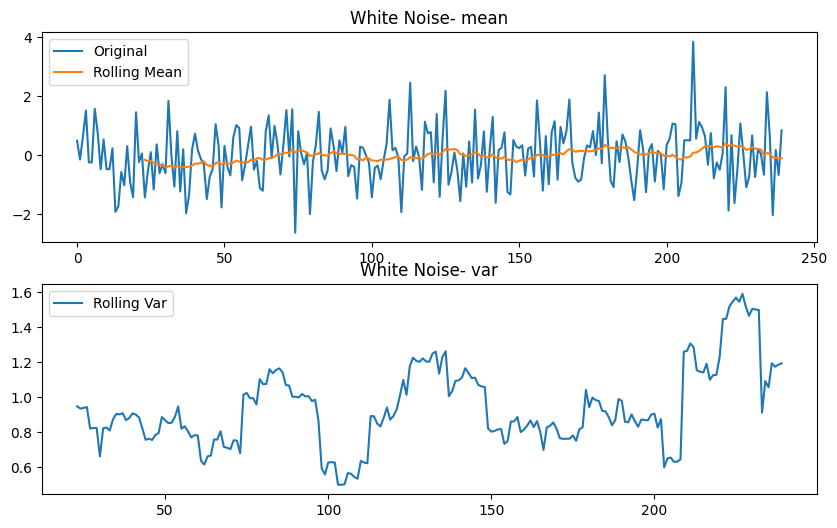

In [ ]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

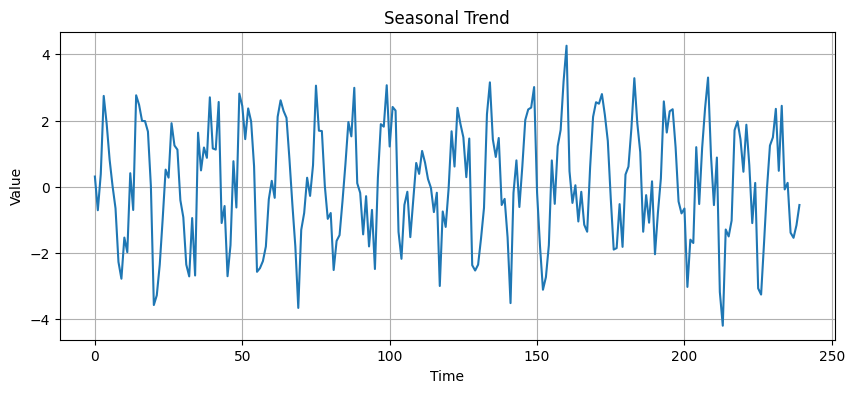

Test Seasonal Trend
ADF Statistic: -3.440 p=0.009678595940914391
KPSS: stat=0.030 p=0.1


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


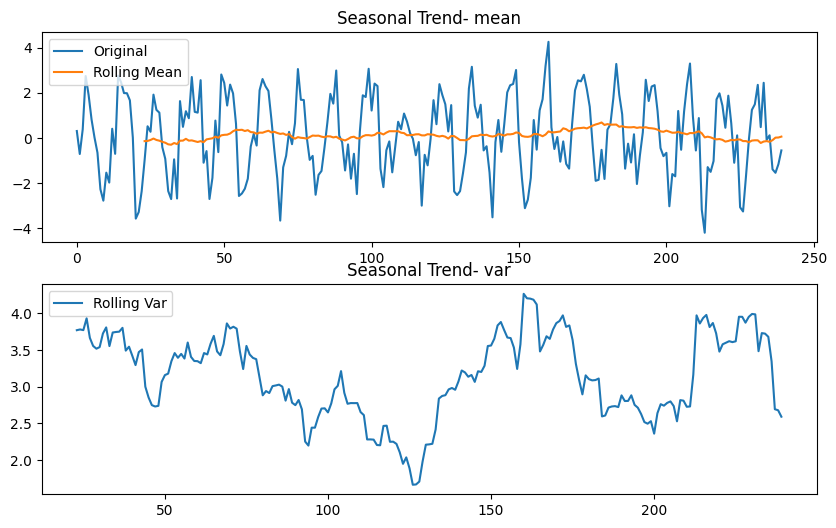

In [ ]:
#Seasonal + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend = 0.000002 * t
seasonal_trend = pd.Series(trend + seasonal + np.random.normal(0, 1, n))

plot_series(seasonal_trend, "Seasonal Trend")
print_test(seasonal_trend, "Seasonal Trend")
rolling_mean_var(seasonal_trend, window=24, title="Seasonal Trend")